## Exercise 1

In [28]:
library(dplyr)
library(ggplot2)

Analytical Mean: 2.4 	Numerical Mean: 2.400757 
Analytical Variance: 0.48 	Numerical Variance: 0.4755 
Numerical Median: 2.328922 


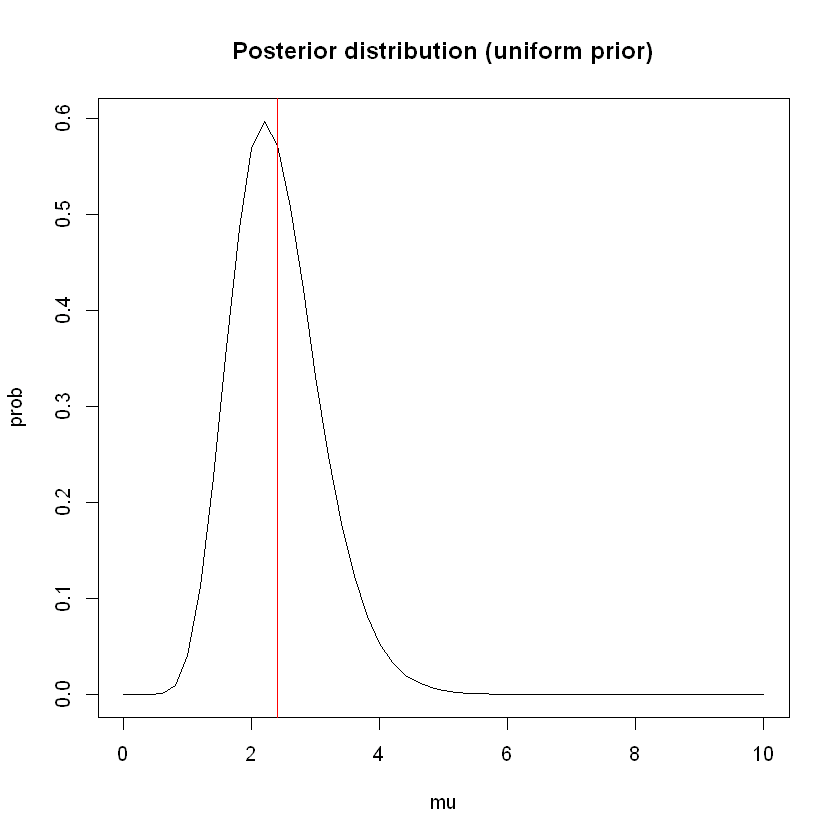

In [ ]:
# defective machines follow Poisson distribution, rate mu unknown
x <- c(3, 0, 1, 5, 2)
n <- length(x)
s <- sum(x)

xplot <- seq(0, 10, 0.2)

#assume positive uniform prior
uprior <- dunif(xplot, min = 0, max = 10)           #equivalent to gamma(1,0)

#determine posterior
al <- s + 1
be <- n
uposterior <- dgamma(xplot, shape = al, rate = be)
plot(x = xplot, y =  uposterior, type ='l', xlab='mu', ylab='prob',main='Posterior distribution (uniform prior)')
#mean, median, variance (analytically and numerically)

mean_a <- al / be
var_a <- al / (be^2)

x_sample <- rgamma(10^4, shape = al, rate = be)
mean_n <- mean(x_sample)
median_n <- median(x_sample)
var_n <- var(x_sample)


abline(v = mean_n, col = "red")

cat("Analytical Mean:", mean_a, "\tNumerical Mean:", mean_n, "\n")
cat("Analytical Variance:", var_a, "\tNumerical Variance:", var_n, "\n")
cat("Numerical Median:", median_n, "\n")


Analytical Mean: 2.142857 	Numerical Mean: 2.139717 
Analytical Variance: 0.3061224 	Numerical Variance: 0.3062814 
Numerical Median: 2.087497 


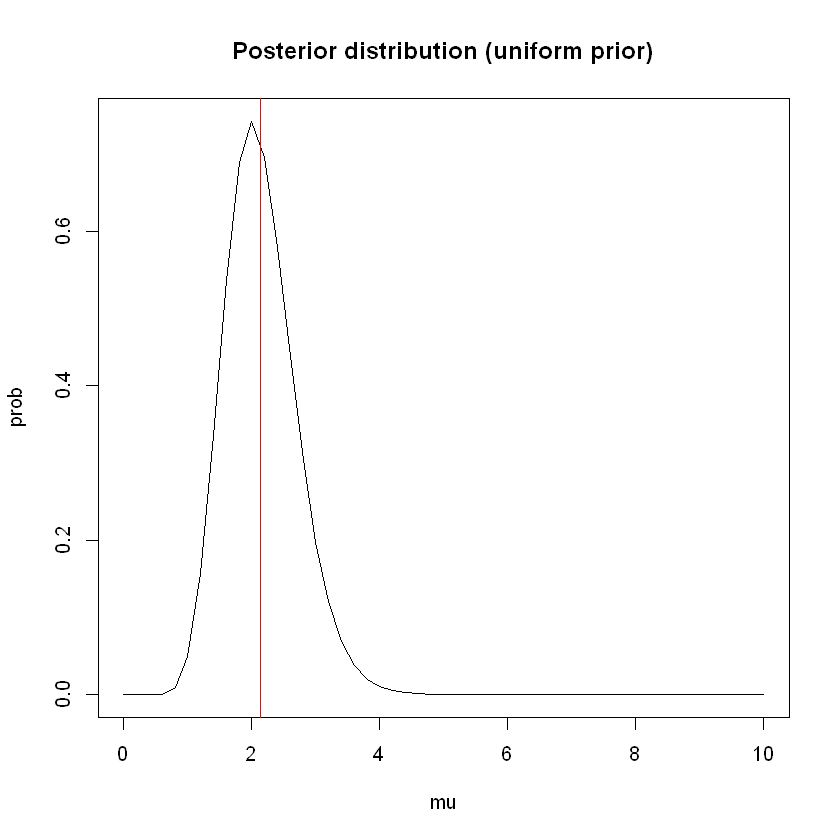

In [ ]:
#assume gamma prior with mean 2, std 1 ---> alpha/beta=2, alpha/beta^2=1 ---> alpha=4, beta=2

#determine posterior
al1 <- s + 4
be1 <- n + 2
gposterior <- dgamma(xplot, shape = al1, rate = be1)

plot(x = xplot, y =  gposterior, type ='l', xlab='mu', ylab='prob', main='Posterior distribution (uniform prior)')
#mean, median, variance (analytically and numerically)

mean_a1 <- al1 / be1
var_a1 <- al1 / (be1^2)

x_sample1 <- rgamma(10^4, shape = al1, rate = be1)
mean_n1 <- mean(x_sample1)
median_n1 <- median(x_sample1)
var_n1 <- var(x_sample1)

abline(v = mean_n1, col = "red")

cat("Analytical Mean:", mean_a1, "\tNumerical Mean:", mean_n1, "\n")
cat("Analytical Variance:", var_a1, "\tNumerical Variance:", var_n1, "\n")
cat("Numerical Median:", median_n1, "\n")



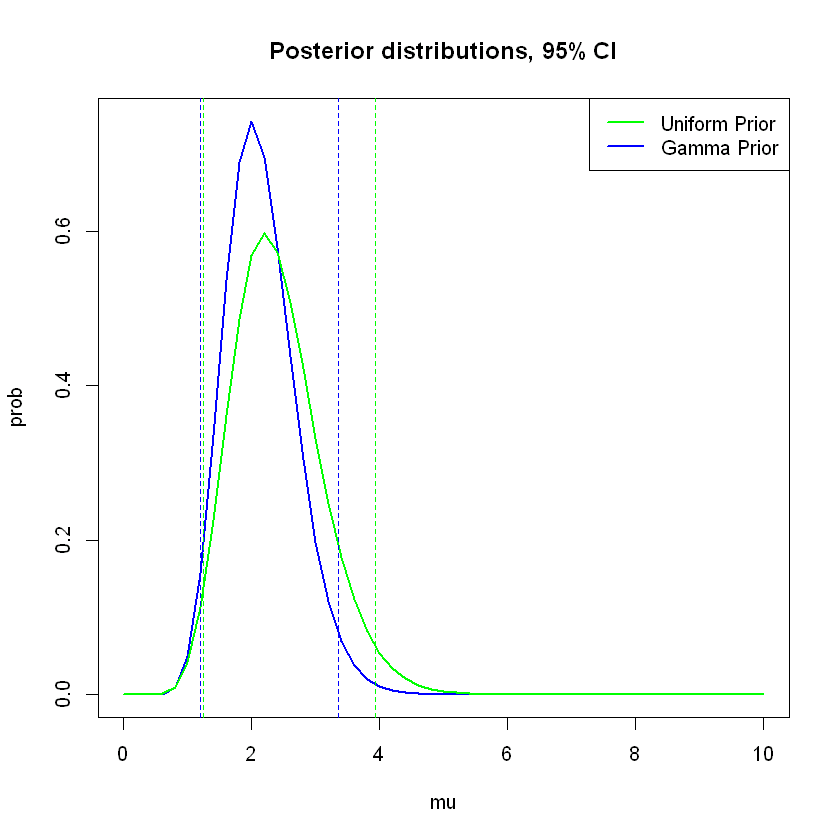

In [31]:
# 95% c.i. for both results

#uniform prior
plot(x = xplot, y =  gposterior, type ='l', lwd=2,xlab='mu', ylab='prob', col='blue', main='Posterior distributions, 95% CI')
lines(x = xplot, y = uposterior, type ='l', lwd=2, col='green')

ucredinterv = qgamma(c(0.025, 0.975), shape = al, rate = be)
#gamma prior
gcredinterv = qgamma(c(0.025, 0.975), shape = al1, rate = be1)

abline(v = ucredinterv, col = 'green', lty = 2)
abline(v = gcredinterv, col = 'blue', lty = 2)

legend("topright", legend = c("Uniform Prior", "Gamma Prior"),
       col = c("green", "blue"), lwd = 2)

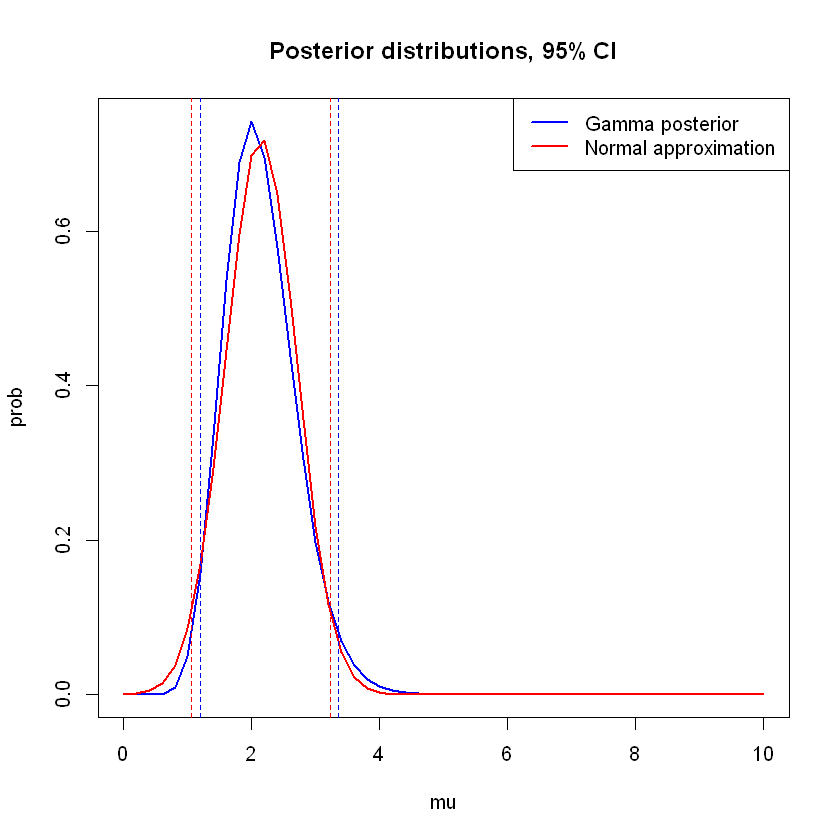

In [32]:
#compare the results with gamma posterior and and a normal approximation
plot(x = xplot, y =  gposterior, type ='l', lwd=2,xlab='mu', ylab='prob', col='blue', main='Posterior distributions, 95% CI')

normapprox <- dnorm(xplot, mean = mean_a1, sd=var_a1^(1/2))

ncredinterv = qnorm(c(0.025, 0.975), mean = mean_a1, sd=var_a1^(1/2))

lines(x=xplot, y = normapprox, type ='l', lwd=2, col='red')
abline(v = gcredinterv, col = 'blue', lty = 2)
abline(v = ncredinterv, col = 'red', lty = 2)

legend("topright", legend = c("Gamma posterior", "Normal approximation"),
       col = c("blue", "red"), lwd = 2)

## Exercise 2

In [33]:
#assume binomial: n= num trials, r= num success
n <- 20
r <- 12
# evaluate mean and std for uniform prior and jeffrey prior

apu <- 1    #uniform prior <-> beta(1,1)
bpu <- 1
au <- apu + r
bu <- bpu + n - r

apj <- 1 / 2  #jeffrey prior
bpj <- 1 / 2
aj <- apj + r
bj <- bpj + n - r

mu <- au / (au + bu)
stdu <- (au * bu / ((au + bu)^2 * (au + bu + 1)))^(1 / 2)
mj <- aj / (aj + bj)
stdj <- (aj * bj / ((aj + bj)^2 * (aj + bj + 1)))^(1 / 2)

cat("Uniform prior:  Posterior mean (p)=", mu, "  Posterior std  =", stdu, "\n")

cat("Jeffreys prior:  Posterior mean (p)=", mj, "  Posterior std  =", stdj, "\n")

cat("Expected detection: Unirfom", n*mu, " Jeffrey", n*mj)

Uniform prior:  Posterior mean (p)= 0.5909091   Posterior std  = 0.1025195 
Jeffreys prior:  Posterior mean (p)= 0.5952381   Posterior std  = 0.1046487 
Expected detection: Unirfom 11.81818  Jeffrey 11.90476

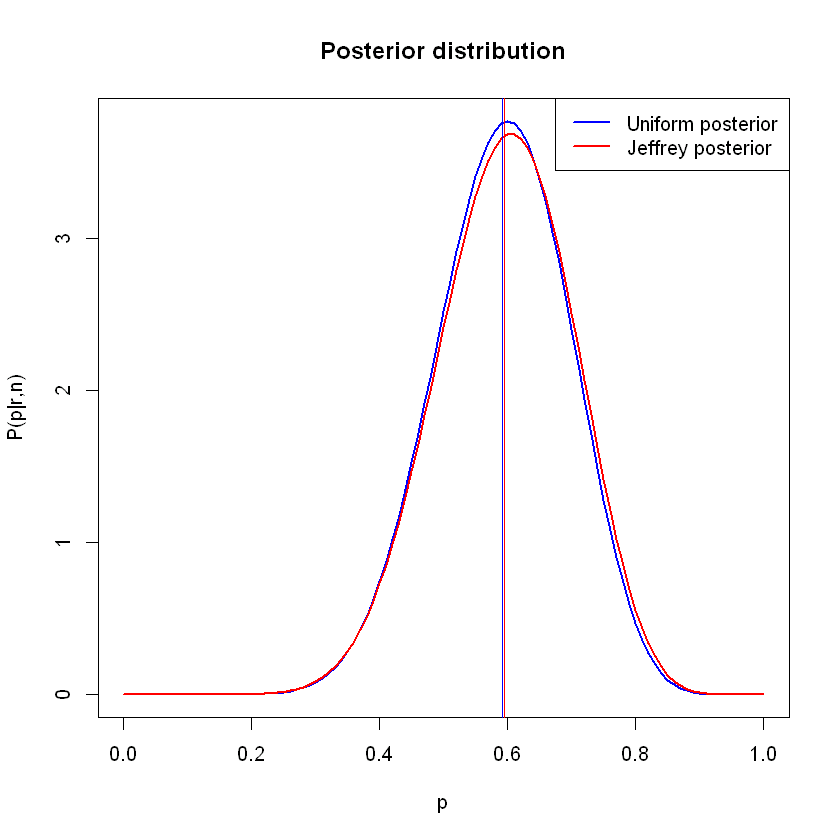

In [34]:
#plot the posteriors
x_grid <- seq(0, 1, 0.01)
upost <- dbeta(x_grid, au, bu)
jpost <- dbeta(x_grid, aj, bj)

plot(x_grid, upost, type='l', lwd=2, col='blue', main = 'Posterior distribution', xlab= 'p', ylab='P(p|r,n)')
lines(x_grid, jpost, col='red', lwd=2)
abline(v=mu, col= 'blue')
abline(v=mj, col='red')
legend('topright', legend = c("Uniform posterior", "Jeffrey posterior"),
       col = c("blue", "red"), lwd = 2)

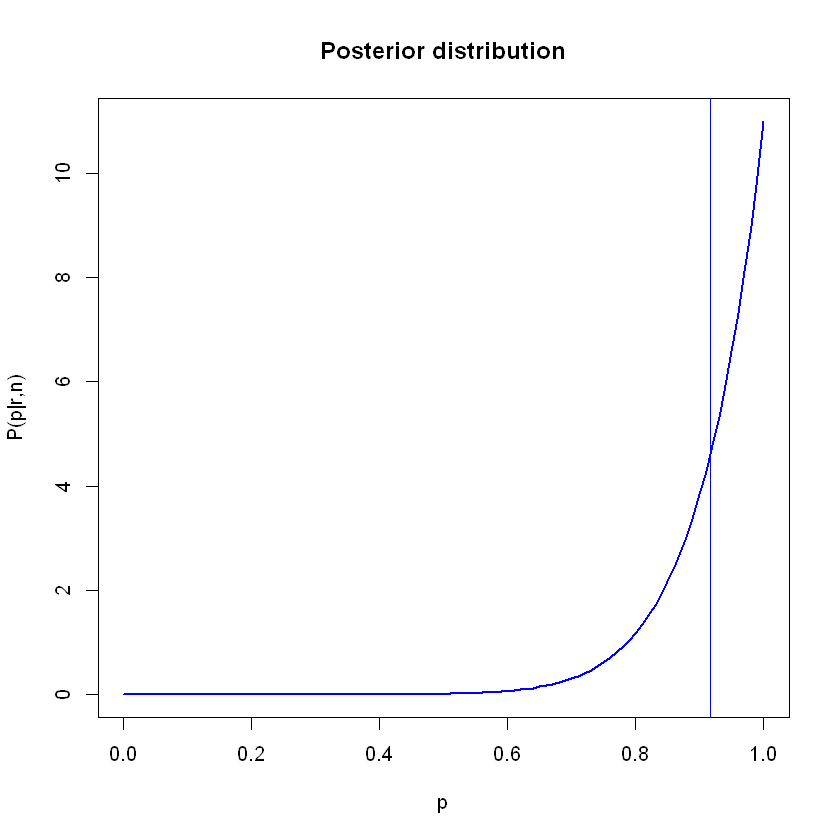

In [35]:
# RESEARCHER B
n <- 10
r <- 10

a2 <- 1 + r
b2 <- 1 + n - r
m2 <- a2 / (a2 + b2)
std2 <- sqrt((a2 * b2) / ((a2 + b2)^2 * (a2 + b2 + 1)))

#plot the posterior
x_grid <- seq(0, 1, 0.01)
post2 <- dbeta(x_grid, a2, b2)
plot(x_grid, post2, type='l', lwd=2, col='blue', main = 'Posterior distribution', xlab= 'p', ylab='P(p|r,n)')
abline(v=m2, col= 'blue')


B prior:  Posterior mean (p)= 0.5909091   Posterior std  = 0.1025195 
Expected detection: 14.375

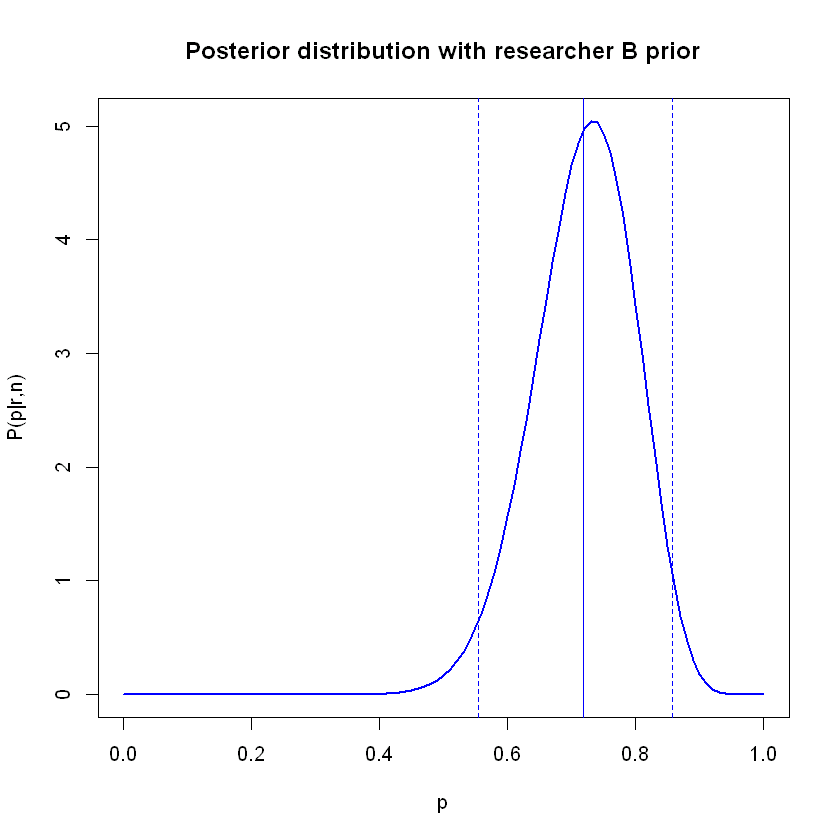

In [36]:
# RECOMPUTE WITH RESEARCHER A DATA AND RESEARCHER B POSTERIOR AS PRIOR
n <- 20
r <- 12
# evaluate mean and std for uniform prior and jeffrey prior

a3 <- a2 + r
b3 <- b2 + n - r


m3 <- a3 / (a3 + b3)
std3 <- (a3 * b3 / ((a3 + b3)^2 * (a3 + b3 + 1)))^(1 / 2)

cat("B prior:  Posterior mean (p)=", mu, "  Posterior std  =", stdu, "\n")

cat("Expected detection:", n *m3)
x_grid <- seq(0, 1, 0.01)
post3 <- dbeta(x_grid, a3, b3)

plot(x_grid, post3, type='l', lwd=2, col='blue', main = 'Posterior distribution with researcher B prior', xlab= 'p', ylab='P(p|r,n)')
abline(v=m3, col= 'blue')

# 95% CI
CIbounds <- qbeta(c(0.025, 0.975), a3, b3)
abline(v = CIbounds, col = 'blue', lty = 2)

## Exercise 3

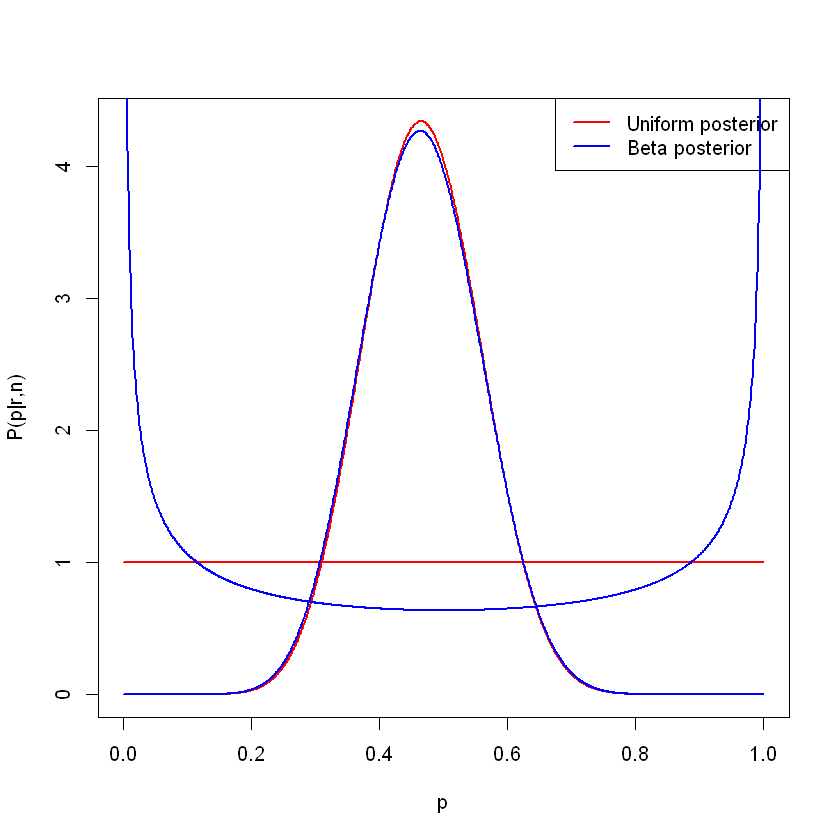

In [37]:
normalize <- function(fx, x) {
  area <- sum((fx[-1] + fx[-length(fx)]) / 2 * diff(x))
  fx / area
}

n <- 28
h <- 13
t <- n - h
p_grid <- seq(0, 1, 0.001)

flat_prior <- dunif(p_grid, min = 0, max = 1)
beta_prior <- dbeta(p_grid, 0.5, 0.5)
likelihood <- dbinom(h, n, p_grid)

posterior_flat <- dbeta(p_grid, 1 + h, 1 + t)
posterior_beta <- dbeta(p_grid, 0.5 + h, 0.5 + t)

likelihood_norm <- normalize(likelihood, p_grid)
posterior_flat_norm <- normalize(posterior_flat, p_grid)
posterior_beta_norm <- normalize(posterior_beta, p_grid)

plot(p_grid, likelihood_norm, type='l', lwd=2, lty = 2, xlab= 'p', ylab='P(p|r,n)')
lines(p_grid, flat_prior, col = 'red', lwd = 2)
lines(p_grid, posterior_flat_norm, lwd =2,col = 'red')
lines(p_grid, beta_prior, col = 'blue', lwd = 2)
lines(p_grid, posterior_beta_norm, col = 'blue', lwd =2)
legend('topright', legend = c("Uniform posterior", "Beta posterior"),
       col = c("red", "blue"), lwd = 2)

In [38]:
p_max_flat <- p_grid[which.max(posterior_flat_norm)]
p_max_beta <- p_grid[which.max(posterior_beta_norm)]

cat("Most probable p (Uniform prior):", p_max_flat, "\n")
cat("Most probable p (Beta prior):", p_max_beta, "\n")

ci_flat <- qbeta(c(0.025, 0.975), 1 + h, 1 + t)
ci_beta <- qbeta(c(0.025, 0.975), 0.5 + h, 0.5 + t)

cat("95% credible interval (Uniform prior):", ci_flat, "\n")
cat("95% credible interval (Beta prior):", ci_beta, "\n")

Most probable p (Uniform prior): 0.464 
Most probable p (Beta prior): 0.463 
95% credible interval (Uniform prior): 0.2944856 0.6430613 
95% credible interval (Beta prior): 0.2906811 0.6448625 


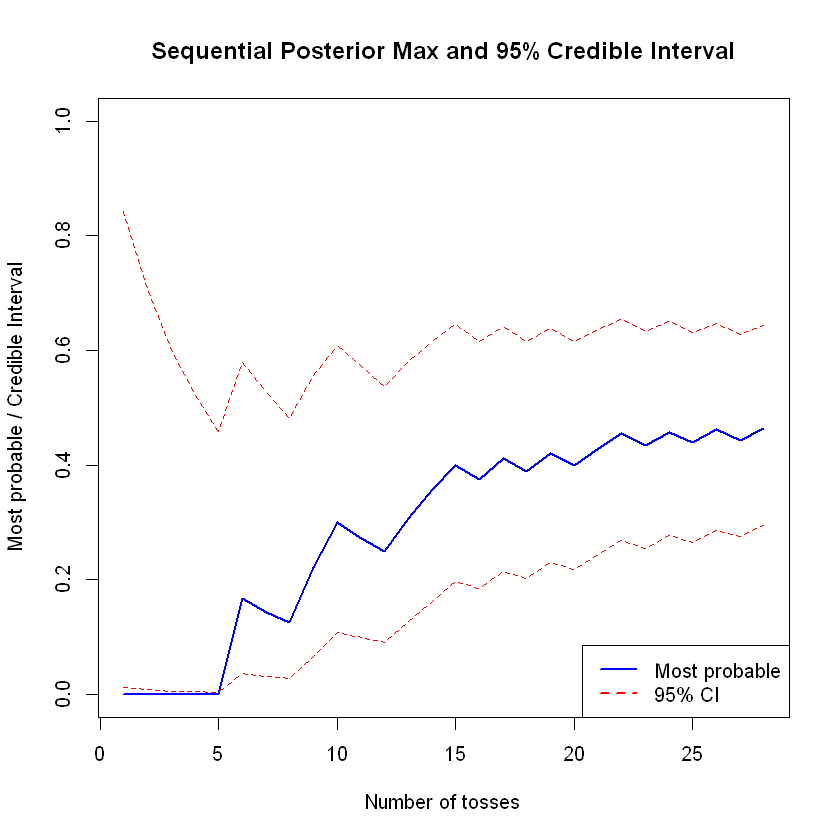

In [42]:
# sequential analysis
heads <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
            1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1)


p_grid <- seq(0, 1, 0.001)

p_maxes <- numeric(length(heads))
ci_lowers <- numeric(length(heads))
ci_uppers <- numeric(length(heads))

# flat prior: Beta(1,1)
a0 <- 1
b0 <- 1

# Sequential update

for (i in 1:length(heads)) {
  h <- sum(heads[1:i])
  t <- i - h
  
  # posterior: Beta(a0 + h, b0 + t)
  a_post <- a0 + h
  b_post <- b0 + t
  posterior <- dbeta(p_grid, a_post, b_post)
  posterior <- normalize(posterior, p_grid)
  
  # Posterior max
  p_maxes[i] <- p_grid[which.max(posterior)]
  
  # 95% credible interval from true Beta
  ci_bounds <- qbeta(c(0.025, 0.975), a_post, b_post)
  ci_lowers[i] <- ci_bounds[1]
  ci_uppers[i] <- ci_bounds[2]
}

# Plot posterior mode and credible intervals over trials
plot(1:28, p_maxes, type = "l", col = "blue", lwd = 2,
     ylim = c(0, 1), xlab = "Number of tosses", ylab = "Most probable / Credible Interval",
     main = "Sequential Posterior Max and 95% Credible Interval")

lines(1:28, ci_lowers, col = "red", lty = 2)
lines(1:28, ci_uppers, col = "red", lty = 2)

legend("bottomright", legend = c("Most probable", "95% CI"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)


In [45]:
cat("Final sequential result: max", p_maxes[length(heads)], " CI", c(ci_lowers[length(heads)], ci_uppers[length(heads)]), "\nOne-step result: max", p_max_flat, " CI", ci_flat)
cat("\nResults are the same!")

Final sequential result: max 0.464  CI 0.2944856 0.6430613 
One-step result: max 0.464  CI 0.2944856 0.6430613
Results are the same!

## Exercise 4

In [55]:
n <- 200
a <- 57
b <- 31
c <- 45
d <- 67
r <- c(a, b, c, d)
np <- 100
ap <- 32
bp <- 14
cp <- 26
dp <- 28
p <- c(ap, bp, cp, dp)
party <- c("A", "B", "C", "D")

#treat each party independently (binomial)
party_inference <- function(party, r, n, p, np) {
    p_grid <- seq(0, 1, 0.001)
    uposterior <- dbeta(p_grid, 1 + r, 1 + n - r)
    umax <- p_grid[which.max(uposterior)]
    ucibounds <- qbeta(c(0.16, 1 - 0.16), 1 + r, 1 + n - r)
    pollposterior <- dbeta(p_grid, 1 + p + r, 1 + np - p + n - r)
    pollcibounds <- qbeta(c(0.16, 1 - 0.16), 1 + p + r, 1 + np - p + n - r)
    pollmax <- p_grid[which.max(pollposterior)]
    cat("Party ", party, "\nUniform prior:\texpected votes (%)", umax * 100,
                            "\t68% CI bounds", ucibounds,
                        "\nPoll prior:\texpected votes (%)", pollmax * 100,
                            "\t68% CI bounds", pollcibounds, "\n\n")
}

In [56]:
for(i in 1:4) party_inference(party[i], r[i], n, p[i], np)

Party  A 
Uniform prior:	expected votes (%) 28.5 	68% CI bounds 0.2554901 0.3187561 
Poll prior:	expected votes (%) 29.7 	68% CI bounds 0.2718466 0.3241718 

Party  B 
Uniform prior:	expected votes (%) 15.5 	68% CI bounds 0.132933 0.1838813 
Poll prior:	expected votes (%) 15 	68% CI bounds 0.1317912 0.172831 

Party  C 
Uniform prior:	expected votes (%) 22.5 	68% CI bounds 0.1984137 0.2570177 
Poll prior:	expected votes (%) 23.7 	68% CI bounds 0.2140415 0.2627693 

Party  D 
Uniform prior:	expected votes (%) 33.5 	68% CI bounds 0.3035773 0.3696814 
Poll prior:	expected votes (%) 31.7 	68% CI bounds 0.2912392 0.3445151 



In [ ]:
#USING MULTINOMIAL AND DIRICHLET PRIOR
# Observed data
counts <- c(A = 57, B = 31, C = 45, D = 67)

# Prior 1: Uniform Dirichlet(1,1,1,1)
prior1 <- rep(1, 4)
posterior1 <- prior1 + counts

# Prior 2: Informative prior from earlier poll (with +1 pseudo-count)
prior2 <- c(A = 33, B = 15, C = 27, D = 29)
posterior2 <- prior2 + counts

# Function to compute expected value and 68% CI for Dirichlet marginals
posterior_summary <- function(posterior) {
  total <- sum(posterior)
  expected <- posterior / total
  lower <- qbeta(0.16, posterior, total - posterior)
  upper <- qbeta(0.84, posterior, total - posterior)
  data.frame(Expected = expected, CI_Lower = lower, CI_Upper = upper)
}

# Summaries
summary_uniform <- posterior_summary(posterior1)
summary_informative <- posterior_summary(posterior2)

# Add party names
rownames(summary_uniform) <- names(counts)
rownames(summary_informative) <- names(counts)

# Print results
cat("===> Posterior with Uniform Prior:\n")
print(round(summary_uniform * 100, 2))  # Convert to percentages

cat("\n===> Posterior with Informative Prior:\n")
print(round(summary_informative * 100, 2))


===> Posterior with Uniform Prior:
  Expected CI_Lower CI_Upper
A    28.43    25.29    31.57
B    15.69    13.16    18.21
C    22.55    19.64    25.45
D    33.33    30.05    36.61

===> Posterior with Informative Prior:
  Expected CI_Lower CI_Upper
A    29.61    27.00    32.21
B    15.13    13.09    17.17
C    23.68    21.26    26.11
D    31.58    28.93    34.23
